In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

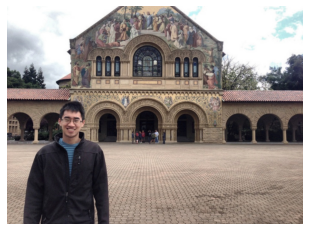

In [8]:
imag = cv2.imread('../data/inputs/man.png')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)


plt.imshow(imag)
plt.axis('off')
plt.show()

In [9]:
def findBoundingBoxFace(img):
    # using cv2 cascade classifier
    face_cascade = cv2.CascadeClassifier()
    face_cascade.load(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    if(len(faces) == 0):
        return None
    bigFace = (0, 0, 0, 0)
    for i in range(len(faces)):
        if(faces[i][2]*faces[i][3] > bigFace[2]*bigFace[3]):
            bigFace = faces[i]
    (x, y, w, h) = bigFace
    return (x, y, w, h)    

In [10]:
def findBoundingBoxBody(img):
    (x, y, w, h) = findBoundingBoxFace(img)
    if(x == None):
        return None
    (xb, yb, wb, hb) = (x-w, y-h, 3*w, img.shape[0] - y +h)
    return (xb, yb, wb, hb), (x, y, w, h)

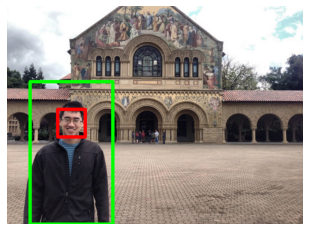

In [11]:
grayMan = cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)
boxMan = imag.copy()

face = findBoundingBoxBody(grayMan)

if face is None:
    print("No face found")
else:
    (xb, yb, wb, hb), (x, y, w, h) = face
    cv2.rectangle(boxMan, (xb, yb), (xb+wb, yb+hb), (0, 255, 0), 10)
    cv2.rectangle(boxMan, (x, y), (x+w, y+h), (255, 0, 0), 10)
    plt.axis('off')
    plt.imshow(boxMan)
    plt.show()
    # interchange r and b
    boxMan = cv2.cvtColor(boxMan, cv2.COLOR_RGB2BGR)
    cv2.imwrite('../data/outs/boxMan.png', boxMan)